In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

train.json
train.json.zip



In [2]:
df = pd.read_json(open("../input/train.json", "r"))

In [3]:
print(df.shape)

(49352, 15)


In [4]:
df['features'] = df['features'].apply(str)
df['photos'] = df['photos'].apply(str)

In [5]:
df.head(7)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"['Laundry In Building', 'Dishwasher', 'Hardwoo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,['https://photos.renthop.com/2/6887163_de85c42...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"['Hardwood Floors', 'No Fee']",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,['https://photos.renthop.com/2/6888711_6e660ce...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,['Pre-War'],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,['https://photos.renthop.com/2/6934781_1fa4b41...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,['https://photos.renthop.com/2/6894514_9abb859...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"['prewar', 'elevator', 'Dogs Allowed', 'Cats A...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,['https://photos.renthop.com/2/6930771_7e3622b...,3600,210 West 107th Street


In [6]:
#help(df.to_sql)
def to_sql():
    import sqlalchemy
    from sqlalchemy import create_engine
    engine = create_engine('sqlite:///../renthop.db')
    df.to_sql('listings', engine, chunksize=1, dtype={'features': sqlalchemy.types.Text, 'display_address': sqlalchemy.types.Text}) 

    

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64
Int64Index([1, 2, 0, 3, 4, 5, 6, 8, 7], dtype='int64')


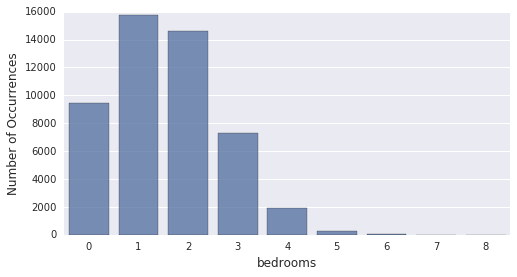

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

cnt_srs = df['bedrooms'].value_counts()
print(cnt_srs)
print(cnt_srs.index)

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

13000.0


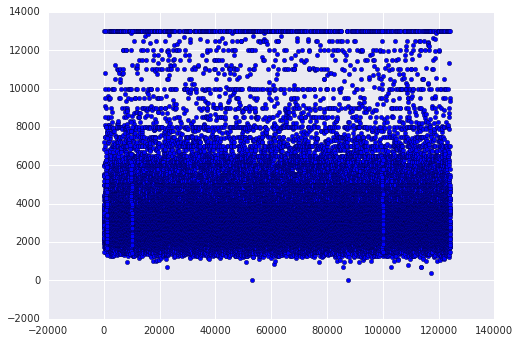

In [71]:
p = np.percentile(df.price.values, 99)

df.price.ix[df['price'] > p] = p#.apply(lambda x: 12)
print(df.price.max())

plt.scatter(df.index, df.price)
#t.price